In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.sex=df.sex.apply(lambda x: 1 if x=='male' else 0)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [6]:
df.smoker=df.smoker.apply(lambda x: 1 if x=='yes' else 0)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [7]:
Region=pd.get_dummies(df.region,drop_first=True)
Region

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [8]:
new_df=pd.concat([df,Region],axis=1)
new_df

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,1,0,0
1334,18,0,31.920,0,0,northeast,2205.98080,0,0,0
1335,18,0,36.850,0,0,southeast,1629.83350,0,1,0
1336,21,0,25.800,0,0,southwest,2007.94500,0,0,1


In [9]:
new_df.drop('region',axis=1,inplace=True)
new_df

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


In [19]:
new_df.age=new_df.age/100
new_df

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,0.19,0,27.900,0,1,16884.92400,0,0,1
1,0.18,1,33.770,1,0,1725.55230,0,1,0
2,0.28,1,33.000,3,0,4449.46200,0,1,0
3,0.33,1,22.705,0,0,21984.47061,1,0,0
4,0.32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.50,1,30.970,3,0,10600.54830,1,0,0
1334,0.18,0,31.920,0,0,2205.98080,0,0,0
1335,0.18,0,36.850,0,0,1629.83350,0,1,0
1336,0.21,0,25.800,0,0,2007.94500,0,0,1


In [20]:
new_df.bmi=new_df.bmi/55
new_df

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,0.19,0,0.507273,0,1,16884.92400,0,0,1
1,0.18,1,0.614000,1,0,1725.55230,0,1,0
2,0.28,1,0.600000,3,0,4449.46200,0,1,0
3,0.33,1,0.412818,0,0,21984.47061,1,0,0
4,0.32,1,0.525091,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.50,1,0.563091,3,0,10600.54830,1,0,0
1334,0.18,0,0.580364,0,0,2205.98080,0,0,0
1335,0.18,0,0.670000,0,0,1629.83350,0,1,0
1336,0.21,0,0.469091,0,0,2007.94500,0,0,1


In [21]:
new_df.charges=new_df.charges/50000
new_df

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,0.19,0,0.507273,0,1,0.337698,0,0,1
1,0.18,1,0.614000,1,0,0.034511,0,1,0
2,0.28,1,0.600000,3,0,0.088989,0,1,0
3,0.33,1,0.412818,0,0,0.439689,1,0,0
4,0.32,1,0.525091,0,0,0.077337,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.50,1,0.563091,3,0,0.212011,1,0,0
1334,0.18,0,0.580364,0,0,0.044120,0,0,0
1335,0.18,0,0.670000,0,0,0.032597,0,1,0
1336,0.21,0,0.469091,0,0,0.040159,0,0,1


In [22]:
new_df.describe()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
count,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.39207,0.505232,0.557516,1.094918,0.204783,0.265408,0.242900,0.272048,0.242900
std,0.14050,0.500160,0.110876,1.205493,0.403694,0.242200,0.428995,0.445181,0.428995
min,0.18000,0.000000,0.290182,0.000000,0.000000,0.022437,0.000000,0.000000,0.000000
25%,0.27000,0.000000,0.478114,0.000000,0.000000,0.094806,0.000000,0.000000,0.000000
50%,0.39000,1.000000,0.552727,1.000000,0.000000,0.187641,0.000000,0.000000,0.000000
75%,0.51000,1.000000,0.630795,2.000000,0.000000,0.332798,0.000000,1.000000,0.000000
max,0.64000,1.000000,0.966000,5.000000,1.000000,1.275409,1.000000,1.000000,1.000000


In [23]:
new_df.charges=new_df.charges/2

In [24]:
new_df.describe()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
count,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.39207,0.505232,0.557516,1.094918,0.204783,0.132704,0.242900,0.272048,0.242900
std,0.14050,0.500160,0.110876,1.205493,0.403694,0.121100,0.428995,0.445181,0.428995
min,0.18000,0.000000,0.290182,0.000000,0.000000,0.011219,0.000000,0.000000,0.000000
25%,0.27000,0.000000,0.478114,0.000000,0.000000,0.047403,0.000000,0.000000,0.000000
50%,0.39000,1.000000,0.552727,1.000000,0.000000,0.093820,0.000000,0.000000,0.000000
75%,0.51000,1.000000,0.630795,2.000000,0.000000,0.166399,0.000000,1.000000,0.000000
max,0.64000,1.000000,0.966000,5.000000,1.000000,0.637704,1.000000,1.000000,1.000000


In [25]:
X=new_df.drop('charges',axis=1)
y=new_df.charges

In [26]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,0.19,0,0.507273,0,1,0,0,1
1,0.18,1,0.614000,1,0,0,1,0
2,0.28,1,0.600000,3,0,0,1,0
3,0.33,1,0.412818,0,0,1,0,0
4,0.32,1,0.525091,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0.50,1,0.563091,3,0,1,0,0
1334,0.18,0,0.580364,0,0,0,0,0
1335,0.18,0,0.670000,0,0,0,1,0
1336,0.21,0,0.469091,0,0,0,0,1


In [27]:
y

0       0.168849
1       0.017256
2       0.044495
3       0.219845
4       0.038669
          ...   
1333    0.106005
1334    0.022060
1335    0.016298
1336    0.020079
1337    0.291414
Name: charges, Length: 1338, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [36]:
model=keras.Sequential([
    keras.layers.Dense(500,input_shape=(8,),activation='relu'),
    keras.layers.Dense(1,activation='linear')
])
model.compile(optimizer='adam',
             loss='mean_squared_logarithmic_error',
             metrics=['mse'])
model.fit(X_train,y_train,epochs=30)

Epoch 1/30
34/34 [==============================] - 0s 2ms/step - loss: 0.0069 - mse: 0.0112
Epoch 2/30
34/34 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0043
Epoch 3/30
34/34 [==============================] - 0s 3ms/step - loss: 0.0025 - mse: 0.0037
Epoch 4/30
34/34 [==============================] - 0s 3ms/step - loss: 0.0025 - mse: 0.0037
Epoch 5/30
34/34 [==============================] - 0s 3ms/step - loss: 0.0024 - mse: 0.0036
Epoch 6/30
34/34 [==============================] - 0s 3ms/step - loss: 0.0025 - mse: 0.0036
Epoch 7/30
34/34 [==============================] - 0s 3ms/step - loss: 0.0021 - mse: 0.0031
Epoch 8/30
34/34 [==============================] - 0s 3ms/step - loss: 0.0020 - mse: 0.0029
Epoch 9/30
34/34 [==============================] - 0s 3ms/step - loss: 0.0020 - mse: 0.0029
Epoch 10/30
34/34 [==============================] - 0s 3ms/step - loss: 0.0019 - mse: 0.0028
Epoch 11/30
34/34 [==============================] - 0s 3ms/step - lo

In [38]:
y_predKM=model.predict(X_test)
score=model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.0021 - mse: 0.0030


In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
LModel=LinearRegression()
LModel.fit(X_train,y_train)

LinearRegression()

In [41]:
y_predLM=LModel.predict(X_test)

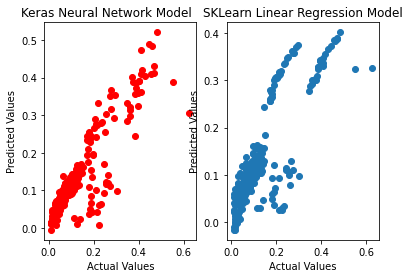

Linear Regression Model Mean Squared Error: 0.004273036468387247


In [49]:
plt.figure(1)
plt.subplot(121)
plt.scatter(y_test,y_predKM,color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Keras Neural Network Model       ',)

plt.subplot(122)
plt.scatter(y_test,y_predLM)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SKLearn Linear Regression Model')
plt.show()

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_predLM)
print('Linear Regression Model Mean Squared Error:',mse)


I see that mean squared error of keras model is 0.0030 which is less than the mean squared error of SKlearn model 0.0042.
Even the scatter plot of Keras Neural Network Model is better than the SKLearn Linear Regression Model.
Clearly Keras model is performing better than SKLearn Linear Regression Model.